## NÏ∞® Í≥ºÏ†ú - API Scrapping_Reddit

- Ï£ºÏ†ú: APIÎ•º ÌôúÏö©Ìïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Î∂ÑÏÑù
- Îç∞Ïù¥ÌÑ∞: Ïª§ÎÆ§ÎãàÌã∞ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(API ÌôúÏö©)
- ÏÇ¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨: praw, wordcloud, seaborn, nltk

### 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è API ÏÑ§Ï†ï

1.1 ÎØ∏Íµ≠ ÏµúÎåÄ Ïª§ÎÆ§ÎãàÌã∞ Ï§ë ÌïòÎÇòÏù∏ Î†àÎîß(Reddit)ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌï¥ praw ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º install Ìï¥Ïïº Ìï©ÎãàÎã§.

In [1]:
!pip install praw

1.2 ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ï†ï

In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨Î•º ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† nltk Ìå®ÌÇ§ÏßÄÎ•º Îã§Ïö¥Î°úÎìúÌïòÍ≤†ÏäµÎãàÎã§(NLP Í≥ºÏ†úÍ∞Ä ÏïÑÎãàÎØÄÎ°ú ÏûêÏÑ∏Ìûà ÏÇ¥Ìé¥Î≥¥ÏßÄÎäî ÏïäÍ≤†ÏäµÎãàÎã§).

Í∂ÅÍ∏àÌïòÏã† Î∂ÑÎì§ÏùÑ ÏúÑÌï¥!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API Ïù∏Ï¶ùÏùÑ Î∞õÍ≤†ÏäµÎãàÎã§. Ï†àÏ∞®Ïùò Í≤ΩÏö∞ Ï∂îÍ∞ÄÎ°ú Ï≤®Î∂ÄÌïú ÏûêÎ£åÎ•º Ï∞∏Í≥†Ìï¥Ï£ºÏÑ∏Ïöî.
### **Í≥ºÏ†úÎ•º Ï†úÏ∂úÌï† ÎïåÎäî Î≥∏ Ìï≠Î™©Ïùò API ÌÇ§Îì§ÏùÄ Î™®Îëê ÏßÄÏö∞Í≥† Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî! Í≥µÏú†ÎêòÎ©¥ Ïïà Îê©ÎãàÎã§.**

In [4]:
#Reddit API Ïù∏Ï¶ù
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Î∂ÑÏÑù

2.1 Î≥∏Í≤©Ï†ÅÏúºÎ°ú APIÎ•º ÌôúÏö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§. Î®ºÏ†Ä subredditÏùÑ 'stocks'Î°ú ÏÑ§Ï†ïÌïòÍ≥† ÏóîÎπÑÎîîÏïÑ Ï£ºÏãùÏóê ÎåÄÌïú Í≤åÏãúÍ∏ÄÏùÑ Í∞ÄÏ†∏Ïò§Í≤†ÏäµÎãàÎã§.

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞Î•º Ï†úÎ™©Í≥º ÎÇ¥Ïö©ÏúºÎ°ú Î∂ÑÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî.

In [6]:
top_posts_data = []
for post in top_posts:
    top_posts_data.append({
        'Title': post.title,
        'Text': post.selftext
    })

df = pd.DataFrame(top_posts_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [7]:
df

Title  \
0         A note to young investors (or new investors)   
1    To all of you who are red this year while the ...   
2    Pelosi's husband buying over $1 million of com...   
3               Beware of what AMC shorts are holding!   
4                        Blackberry -- A Dormant Giant   
..                                                 ...   
230  Here is a Market Recap for today Thursday, Nov...   
231  TSMC sales grow 45% in July on strong AI chip ...   
232  META Still The Cheapest of The Magnificent 7, ...   
233  Made 30% since I started trading 7 months ago ...   
234  CNBC: Meta‚Äôs advertising growth is proof that ...   

                                                  Text  
0    As the Fed caused a bit of a ripple in the mar...  
1    Lately I keep hearing the same old narrative f...  
2    [Full Article](https://www.msn.com/en-us/tv/ne...  
3    I understand that most people in this thread i...  
4    ###**Abbreviation Index:**\n\nBB -- Blackberry...  
..                                                 ...  
230  **PsychoMarket Recap - Thursday, November 18, ...  
231  (Bloomberg) -- Taiwan Semiconductor Manufactur...  
232  Quick glance at some of the numbers for META. ...  
233  Hello folks, \n\nI am a 24 year old who starte...  
234  This is a pretty long article, but I think it ...  

[235 rows x 2 columns]

2.3 Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Îì± Î∂ÑÏÑùÏóê ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌïòÏÑ∏Ïöî.

In [8]:
word_tokens = []
for text in df['Text']:
    tokens = word_tokenize(text)
    word_tokens.extend(tokens)

In [9]:
word_tokens

['As',
 'the',
 'Fed',
 'caused',
 'a',
 'bit',
 'of',
 'a',
 'ripple',
 'in',
 'the',
 'market',
 'today',
 'and',
 'I',
 'considered',
 'vacating',
 'a',
 'position',
 '(',
 'but',
 'ultimately',
 'did',
 "n't",
 ')',
 '.',
 'I',
 'thought',
 'a',
 'little',
 'bit',
 'about',
 'my',
 'journey',
 'over',
 'the',
 'years',
 'and',
 'thought',
 'I',
 "'d",
 'share',
 'a',
 'story',
 'and',
 'a',
 'few',
 'things',
 'I',
 "'ve",
 'learned',
 '.',
 'Back',
 'in',
 '2003',
 ',',
 'I',
 'made',
 'my',
 'first',
 'move',
 'in',
 'the',
 'stock',
 'market',
 'by',
 'taking',
 'an',
 '$',
 '1800',
 'tax',
 'return',
 'and',
 'buying',
 '200',
 'shares',
 'of',
 'a',
 'coal',
 'company',
 'called',
 'Consol',
 '.',
 'At',
 'the',
 'time',
 'it',
 'traded',
 'under',
 'the',
 'symbol',
 'CNX',
 '.',
 'I',
 'bought',
 'it',
 'with',
 'almost',
 'no',
 'DD',
 'simply',
 'because',
 'it',
 'paid',
 'a',
 'pretty',
 'good',
 'dividend',
 '.',
 '(',
 'Around',
 '.50/share',
 'if',
 'I',
 'recall',
 '

In [10]:
stop_words = set(stopwords.words('english'))

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print('Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ï†Ñ :',word_tokens)
print('Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ :',result)

Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ï†Ñ : ['As', 'the', 'Fed', 'caused', 'a', 'bit', 'of', 'a', 'ripple', 'in', 'the', 'market', 'today', 'and', 'I', 'considered', 'vacating', 'a', 'position', '(', 'but', 'ultimately', 'did', "n't", ')', '.', 'I', 'thought', 'a', 'little', 'bit', 'about', 'my', 'journey', 'over', 'the', 'years', 'and', 'thought', 'I', "'d", 'share', 'a', 'story', 'and', 'a', 'few', 'things', 'I', "'ve", 'learned', '.', 'Back', 'in', '2003', ',', 'I', 'made', 'my', 'first', 'move', 'in', 'the', 'stock', 'market', 'by', 'taking', 'an', '$', '1800', 'tax', 'return', 'and', 'buying', '200', 'shares', 'of', 'a', 'coal', 'company', 'called', 'Consol', '.', 'At', 'the', 'time', 'it', 'traded', 'under', 'the', 'symbol', 'CNX', '.', 'I', 'bought', 'it', 'with', 'almost', 'no', 'DD', 'simply', 'because', 'it', 'paid', 'a', 'pretty', 'good', 'dividend', '.', '(', 'Around', '.50/share', 'if', 'I', 'recall', 'correctly', '.', ')', 'This', 'is', 'back', 'when', 'internet', 'trading', 'really', 'was', 

2.4 Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ Ïñ¥Îñ§ Îã®Ïñ¥Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏôîÎäîÏßÄ WordCloudÎ•º ÌÜµÌï¥ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

In [11]:
text=' '.join(result)

In [12]:
wordcloud = WordCloud(random_state=42,width=800, height=400, background_color='grey').generate(text)
wordcloud  # Í∞ùÏ≤¥ Ï£ºÏÜåÍ∞í

In [13]:
# words_ : Í∞ùÏ≤¥Ïùò ÎπÑÏú®Ïùò Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ ÎîïÏÖîÎÑàÎ¶¨Î•º Î∞òÌôò
wordcloud.words_

{'Nvidia': 1.0,
 'stock': 0.8179824561403509,
 'year': 0.7521929824561403,
 'company': 0.6403508771929824,
 'said': 0.6381578947368421,
 'market': 0.5833333333333334,
 'companies': 0.5789473684210527,
 'Intel': 0.5701754385964912,
 'new': 0.5504385964912281,
 'https': 0.543859649122807,
 'chip': 0.5350877192982456,
 'one': 0.5109649122807017,
 'AMD': 0.3969298245614035,
 'earnings release': 0.3969298245614035,
 'AI': 0.3881578947368421,
 '_ _': 0.36403508771929827,
 'price': 0.33114035087719296,
 "n't": 0.3267543859649123,
 'time': 0.3267543859649123,
 'NVDA': 0.3267543859649123,
 'well': 0.31798245614035087,
 'S P': 0.31140350877192985,
 'sale': 0.3092105263157895,
 'GPU': 0.3092105263157895,
 'company s': 0.29605263157894735,
 's': 0.27631578947368424,
 'make': 0.2719298245614035,
 'still': 0.2675438596491228,
 'imgur': 0.25877192982456143,
 'billion': 0.2543859649122807,
 'Tesla': 0.25219298245614036,
 'big': 0.25,
 'people': 0.24780701754385964,
 'per share': 0.24780701754385964,
 

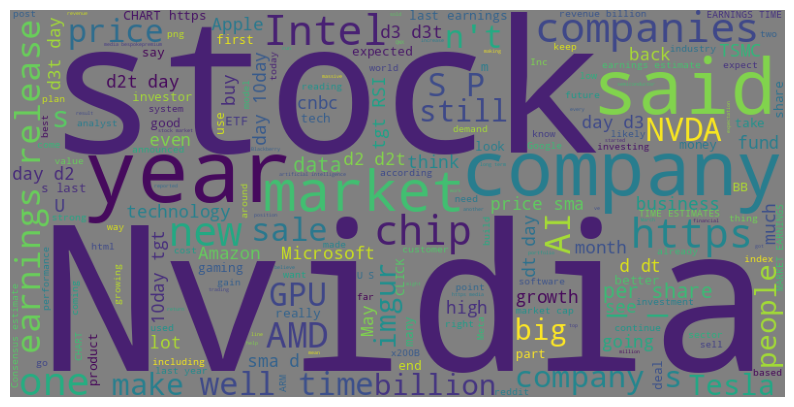

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

2.6 Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ÏóêÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎäîÏßÄ barplotÏùÑ Í∑∏Î†§ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

In [15]:
word_freq=wordcloud.process_text(text)
word_freq

{'Fed': 41,
 'caused': 11,
 'bit': 28,
 'ripple': 2,
 'market': 266,
 'today': 70,
 'considered': 7,
 'vacating': 1,
 'position': 49,
 'ultimately': 11,
 "n't": 149,
 'thought': 37,
 'little': 23,
 'journey': 4,
 'share': 86,
 'story': 15,
 've': 53,
 'learned': 9,
 'back': 107,
 'made': 54,
 'first': 79,
 'stock': 373,
 'taking': 24,
 'tax': 1,
 'return': 51,
 'buying': 10,
 'coal': 3,
 'company': 292,
 'called': 42,
 'Consol': 3,
 'time': 149,
 'traded': 3,
 'symbol': 4,
 'CNX': 1,
 'bought': 45,
 'almost': 30,
 'DD': 5,
 'simply': 14,
 'paid': 8,
 'pretty': 25,
 'good': 79,
 'dividend': 33,
 'around': 67,
 'recall': 5,
 'correctly': 1,
 'internet': 20,
 'trading': 47,
 'really': 75,
 'thing': 67,
 'bank': 17,
 'trade': 31,
 'cost': 69,
 'actually': 35,
 'call': 7,
 'broker': 2,
 'place': 31,
 'phone': 10,
 'Ancient': 3,
 'right': 71,
 'lol': 8,
 'figured': 5,
 'win': 11,
 'lose': 16,
 'draw': 2,
 'eventually': 13,
 'pay': 34,
 'follow': 13,
 'much': 102,
 'holding': 31,
 'realized':

In [16]:
top20_freq = dict(sorted(word_freq.items(), key = lambda item: item[1],reverse=True)[:20])
top20_freq

{'Nvidia': 456,
 'stock': 373,
 'year': 343,
 'company': 292,
 'said': 291,
 'market': 266,
 'companies': 264,
 'Intel': 260,
 'new': 251,
 'https': 248,
 'chip': 244,
 'one': 233,
 'AMD': 181,
 'earnings release': 181,
 'AI': 177,
 '_ _': 166,
 'price': 151,
 "n't": 149,
 'time': 149,
 'NVDA': 149}

<ipython-input-17-4671ffc77f15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top20_freq.values()), y=list(top20_freq.keys()),palette='viridis')


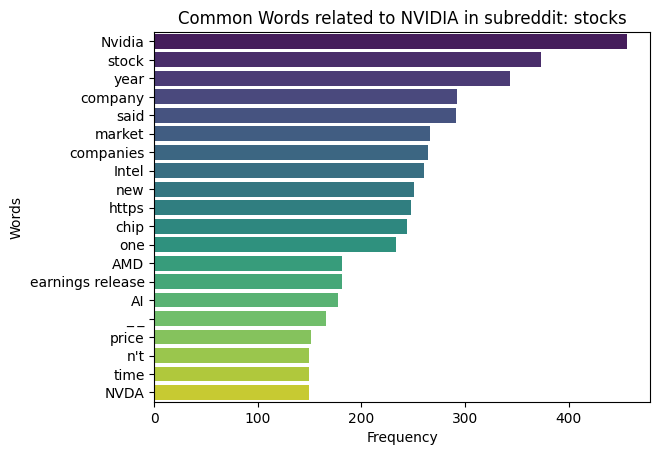

In [17]:
sns.barplot(x=list(top20_freq.values()), y=list(top20_freq.keys()),palette='viridis')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# **Ï†úÏ∂ú Ïãú API Ïù∏Ï¶ù Î∂ÄÎ∂ÑÏùò id, secretÏùÄ Î™®Îëê ÏßÄÏö∞Í≥† Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî!**

### 3. ÏûêÏú† Î∂ÑÏÑù

ÏúÑÏóêÏÑú ÏßÑÌñâÌïú Î∂ÑÏÑùÎßåÏúºÎ°úÎäî Ïú†ÏùòÎØ∏Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌïòÍ∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ìï¥Îãπ Ï£ºÏãùÏóê ÎåÄÌïú ÌèâÍ∞ÄÍ∞Ä Í∏çÏ†ïÏ†ÅÏù∏ÏßÄ, ÎòêÎäî Ïñ¥Îñ†Ìïú Ïù¥ÏäàÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÍ≥º Í∞ôÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌï¥Ï£ºÏÑ∏Ïöî. Í≤åÏãúÍ∏ÄÏù¥ ÏïÑÎãå Î¶¨Î∑∞Î•º Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÎèÑ Í∞ÄÎä•Ìï©ÎãàÎã§.

ÎòêÌïú Î≥∏ Î∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãå Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÍ±∞ÎÇò Îòê Îã§Î•∏ Ïª§ÎÆ§ÎãàÌã∞ ÌòπÏùÄ ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú APIÎ•º Î∞õÏïÑÏôÄ ÏÉàÎ°úÏö¥ Ï£ºÏ†úÎ•º Í∞ÄÏßÄÍ≥† Î∂ÑÏÑùÌïòÎäî Í≤ÉÎèÑ Ï¢ãÏäµÎãàÎã§:)

## **ÏÉùÏÑ±Ìòï ai Í∏∞Î∞ò Í∞êÏÑ±Î∂ÑÏÑù**

In [18]:
!pip install --upgrade google-cloud-language


In [23]:
#ÌôòÍ≤ΩÎ≥ÄÏàò ÏÑ§Ï†ï

import os

# ÏÑúÎπÑÏä§ Í≥ÑÏ†ï ÌÇ§ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
# ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùò Ïù¥Î¶ÑÏùÑ Ï†ïÌôïÌûà ÏûÖÎ†•Ìï©ÎãàÎã§.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = #"mypath"

In [25]:
from google.cloud import language_v1

In [28]:
# Google Cloud Natural Language API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = language_v1.LanguageServiceClient()

def analyze_sentiment(text):
    """
    ÏûÖÎ†• ÌÖçÏä§Ìä∏Ïùò Í∞êÏ†ïÏùÑ Î∂ÑÏÑùÌïòÏó¨ Í∏çÏ†ï, Î≥¥ÌÜµ, Î∂ÄÏ†ïÏùÑ ÌåêÎ≥ÑÌï©ÎãàÎã§.

    Parameters:
    text (str): Î∂ÑÏÑùÌï† ÌÖçÏä§Ìä∏

    Returns:
    dict: Î∂ÑÏÑù Í≤∞Í≥º (Í∞êÏ†ï Ï†êÏàò, Í∞êÏ†ï Í∞ïÎèÑ, Í∞êÏ†ï Î∂ÑÎ•ò)
    """
    # Î∂ÑÏÑùÌï† ÌÖçÏä§Ìä∏ÏôÄ Î¨∏ÏÑú Ïú†ÌòïÏùÑ ÏßÄÏ†ï
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

    # Í∞êÏ†ï Î∂ÑÏÑù ÏöîÏ≤≠ ÏàòÌñâ
    response = client.analyze_sentiment(request={"document": document})
    sentiment = response.document_sentiment

    # Í∞êÏ†ï Ï†êÏàò Î∞è Í∞ïÎèÑ Ï∂îÏ∂ú
    score = sentiment.score
    magnitude = sentiment.magnitude

    # Í∞êÏ†ï Ï†êÏàòÏóê Îî∞Î•∏ Î∂ÑÎ•ò
    if score > 0.25:
        sentiment_label = "Positive"  # Í∏çÏ†ï
    elif score < -0.25:
        sentiment_label = "Negative"  # Î∂ÄÏ†ï
    else:
        sentiment_label = "Neutral"   # Î≥¥ÌÜµ (Ï§ëÎ¶Ω)

    # Í≤∞Í≥º Ï∂úÎ†•
    #print(f"Text: {text}")
    #print(f"Sentiment Score: {score:.2f}")
    #print(f"Sentiment Magnitude: {magnitude:.2f}")
    #print(f"Sentiment Analysis Result: {sentiment_label}")

    # Í≤∞Í≥º Î∞òÌôò
    return {
        "score": score,
        "magnitude": magnitude,
        "sentiment": sentiment_label
    }


In [39]:
analysis=[]

for text in df['Text']:
    analysis.append(analyze_sentiment(text))


In [30]:
df_analysis=pd.DataFrame(analysis)
df_analysis

score  magnitude sentiment
0      0.0  27.600000   Neutral
1     -0.2   6.100000   Neutral
2     -0.2   7.900000   Neutral
3      0.1  16.900000   Neutral
4      0.0  75.900002   Neutral
..     ...        ...       ...
230    0.0  10.400000   Neutral
231    0.0   6.600000   Neutral
232    0.1   4.200000   Neutral
233    0.1  12.700000   Neutral
234    0.0   9.700000   Neutral

[235 rows x 3 columns]

In [35]:
df_analysis['sentiment'].value_counts()

sentiment
Neutral     187
Negative     37
Positive     11
Name: count, dtype: int64

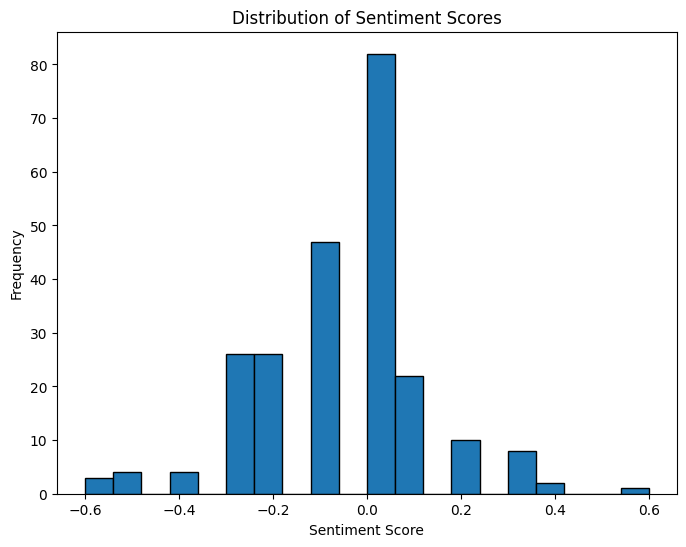

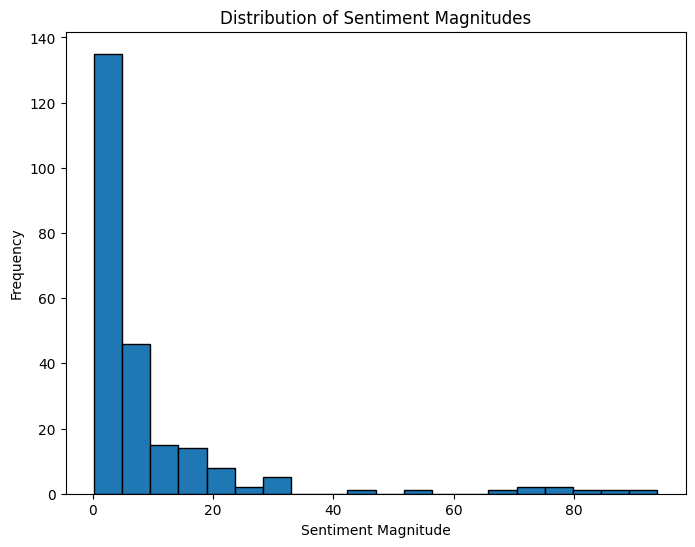

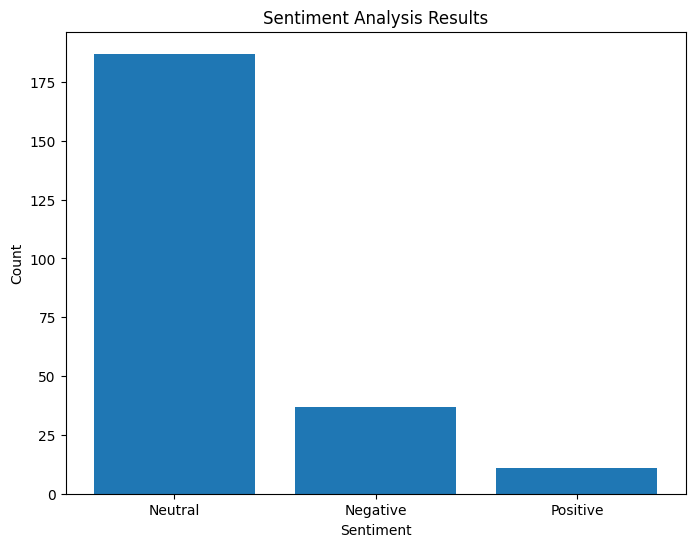

In [31]:
import matplotlib.pyplot as plt

# Score ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 6))
plt.hist(df_analysis['score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Magnitude ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 6))
plt.hist(df_analysis['magnitude'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Magnitudes')
plt.xlabel('Sentiment Magnitude')
plt.ylabel('Frequency')
plt.show()

# Sentiment ÎßâÎåÄ Í∑∏ÎûòÌîÑ
sentiment_counts = df_analysis['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


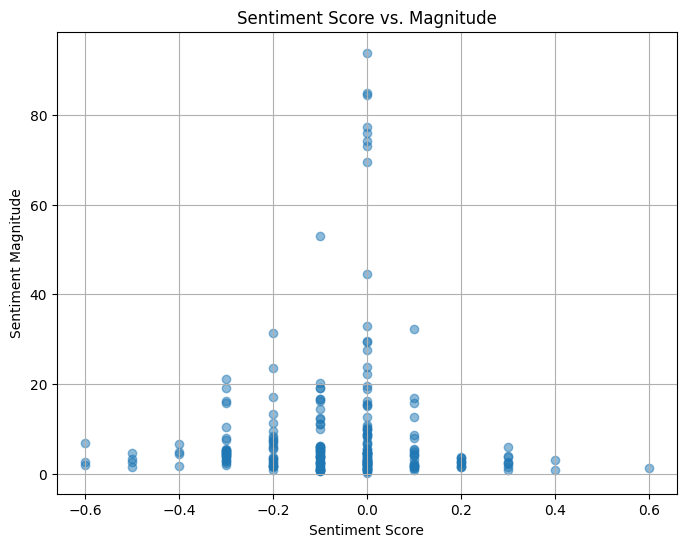

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_analysis['score'], df_analysis['magnitude'], alpha=0.5)
plt.title('Sentiment Score vs. Magnitude')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Magnitude')
plt.grid(True)
plt.show()


Ï§ëÎ¶ΩÏ†ÅÏù∏ ÌÉúÎèÑÏùò Í∏ÄÏù¥ ÎßéÏßÄÎßå nvidiaÏóê ÎåÄÌï¥ Í∏çÏ†ïÎ≥¥Îã§Îäî Î∂ÄÏ†ïÏóê Í∞ÄÍπåÏö¥ Í∞êÏ†ïÏùÑ Í∞ÄÏßÄÍ≥†ÏûàÎã§.
ÎòêÌïú Î∂ÄÏ†ïÏ†ÅÏù∏ Í∏ÄÎì§Ïù¥ Í∞êÏ†ïÏùò Í≤©ÏñëÎèÑ(magnitude)Í∞Ä Ï°∞Í∏à Îçî ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Í∏¥ Í∏ÄÏù¥Îùº Ï†úÎåÄÎ°ú Î∞òÏòÅÏù¥ ÎêòÏßÄ ÏïäÏïòÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥ Í∏ÄÏùò Ï≤´ 500ÏûêÎ°ú Îã§Ïãú ÏßÑÌñâÌï¥Î≥¥ÏïòÎã§.

In [65]:
analysis=[]

for text in df['Text']:
    analysis.append(analyze_sentiment(text[:500]))


In [66]:
df_analysis500=pd.DataFrame(analysis)
df_analysis500

score  magnitude sentiment
0      0.1        1.2   Neutral
1     -0.2        1.4   Neutral
2      0.0        0.2   Neutral
3     -0.2        1.6   Neutral
4      0.0        2.7   Neutral
..     ...        ...       ...
230    0.2        1.3   Neutral
231    0.1        0.7   Neutral
232    0.2        1.3   Neutral
233    0.0        2.4   Neutral
234    0.0        0.5   Neutral

[235 rows x 3 columns]

In [67]:
df_analysis500['sentiment'].value_counts()

sentiment
Neutral     181
Negative     36
Positive     18
Name: count, dtype: int64

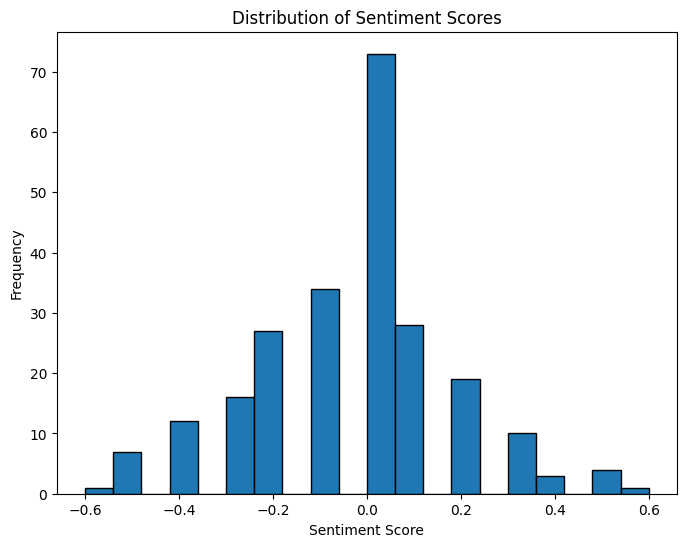

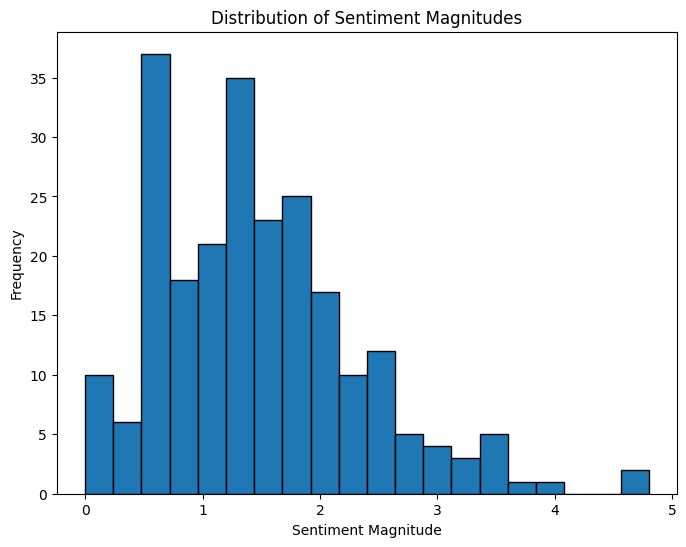

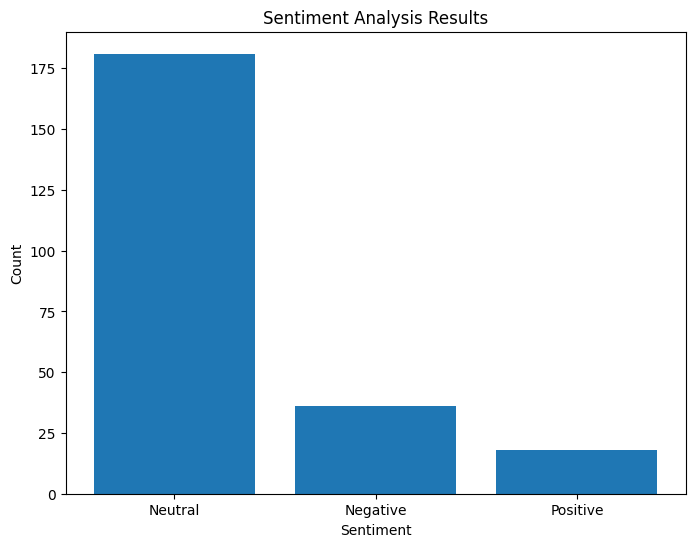

In [68]:
import matplotlib.pyplot as plt

# Score ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 6))
plt.hist(df_analysis500['score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Magnitude ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 6))
plt.hist(df_analysis500['magnitude'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Magnitudes')
plt.xlabel('Sentiment Magnitude')
plt.ylabel('Frequency')
plt.show()

# Sentiment ÎßâÎåÄ Í∑∏ÎûòÌîÑ
sentiment_counts = df_analysis500['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


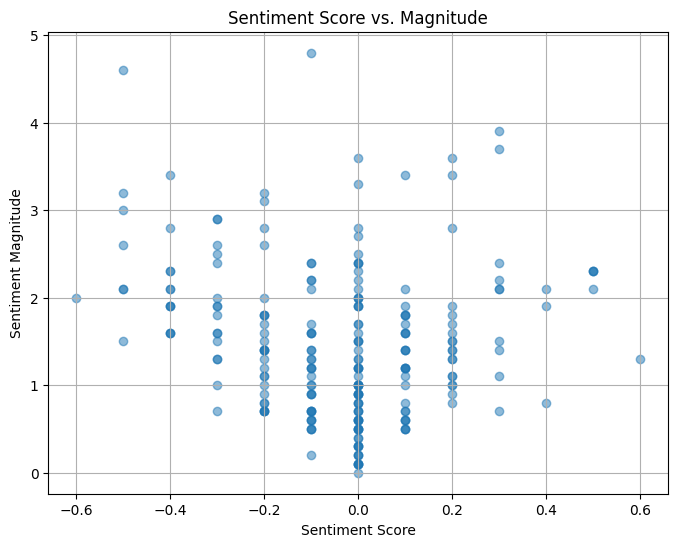

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_analysis500['score'], df_analysis500['magnitude'], alpha=0.5)
plt.title('Sentiment Score vs. Magnitude')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Magnitude')
plt.grid(True)
plt.show()


500,300,100ÏúºÎ°ú Í∏ÄÏûêÏàòÎ•º Ï§ÑÏó¨Î≥¥Îãà Í∏ÄÏûêÏàòÍ∞Ä Ï§ÑÏñ¥Îì§ ÏàòÎ°ù Ï§ëÎ¶ΩÎπÑÏú®Ïù¥ Ï§ÑÍ≥† Í∏çÏ†ï Î∂ÄÏ†ïÏù¥ ÎäòÏñ¥ÎÇ¨Îã§.
500ÏùÄ Í∑∏ÎûòÎèÑ Î∂ÄÏ†ïÏùò ÏàòÍ∞Ä Í∏çÏ†ïÎ≥¥Îã§ ÎÜíÏïòÎã§. 100ÏûêÎ°ú ÌñàÏùÑ Îïê Í∏çÏ†ïÍ≥º Î∂ÄÏ†ïÏùò ÏàòÍ∞Ä 47Í≥º 46ÏúºÎ°ú ÎπÑÏä∑ÌñàÎã§.
Í∏∏Ïñ¥Ïßà ÏàòÎ°ù Í∞êÏ†ïÏù¥ Ìù¨ÏÑùÎê®ÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Î•º Î≥¥ÏôÑÌïòÎ†§Î©¥, Í∏¥ Í∏ÄÏùÑ Ïó¨Îü¨Í∞úÎ°ú ÎÇòÎà†ÏÑú Î∂ÑÏÑùÏùÑ Ïã§ÏãúÌïòÍ≥† Ï†êÏàòÎ•º ÌèâÍ∑†ÏùÑ ÎÇ¥Îäî Îì±Ïùò Î∞©ÏãùÏùÑ ÌôúÏö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.